<a href="https://colab.research.google.com/github/Nouman-wisal/pytorch/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
what_were_doing = {
    1: "Data (prepare and preload data)",
    2: "building model",
    3: "Training (fitting the model to data)",
    4: "inference (making prediction and evaluating the model)",
    5: "saving and loading the model",
    6: "putting it all togather"
}

what_were_doing

{1: 'Data (prepare and preload data)',
 2: 'building model',
 3: 'Training (fitting the model to data)',
 4: 'inference (making prediction and evaluating the model)',
 5: 'saving and loading the model',
 6: 'putting it all togather'}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check python version
torch.__version__

'2.6.0+cu124'

##1.Data (preparing and loading)
####data can be anything... in machine Learning/deepLearning

1.   excel spreadsheets
2.   videos (i.e youtube as a lot of videos/data)
3.   audio (songs,voice notes etc)
4.   images
5.   Text
6.   DNA

Deep learning/machine learning has two parts


1.   turn the data into numerical representations/tensors/numbers
2.   build model to find patterns in those numerical representation/tensors/numbers



Let's create our data as a straight line.

We'll use `linear regression` formula to make a straight line with *known* parameters.


In [ ]:
# create  *known* parameters

weight = 0.7
bias =0.3

# create

start=0
end=1
step=0.02

X= torch.arange(start, end, step).unsqueeze(dim=1)  # X  is the input (inputed numerical parameter)
# print( X ,"\n")

Y= weight * X + bias  # Y is the output
# print(Y,"\n")

print(len(X)) #data points
print(len(Y)) #data points
print(Y.shape)

50
50
torch.Size([50, 1])


##Splitting the data into `Training & Test` sets (one of the most important concepts in ml/dp)

In [ ]:
                                                                # splitting data for trainig & testing into 80 / 20

trainig_split= int(0.8 * len(X))

# print(trainig_split) # result 40

                                                                # slicing the X for trinig and testing
x_train= X[ :trainig_split] # meaning give data from index 0 to 40(till 39)
x_test= X[trainig_split: ]  # meaning dive data from index 40 till the end

# print(x_train,x_test)

y_train= Y[ : trainig_split]
y_test=  Y[trainig_split : ]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

##Visualizing the data with matplotlib in a function

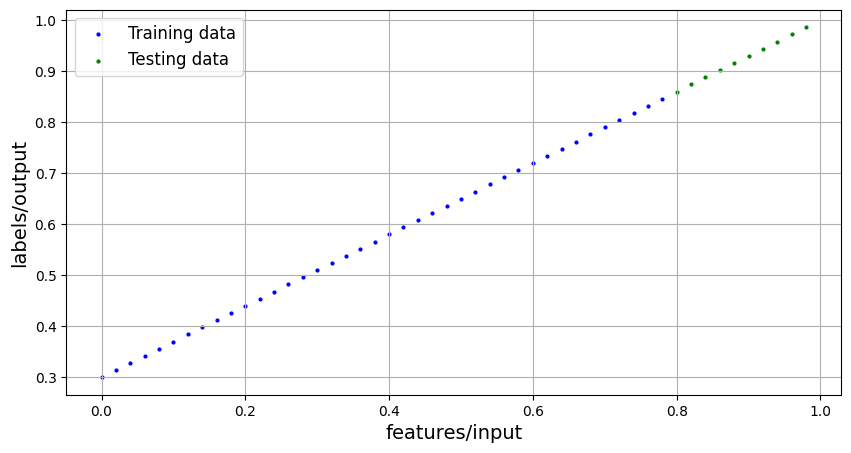

In [ ]:

def plot_predictions(training_data=x_train, trainig_label=y_train, test_data=x_test, test_label=y_test,prediction=None):

    plt.figure(figsize=(10,5))

    plt.scatter(training_data, trainig_label, c="b",s=4, label="Training data")

    plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

    if prediction is not None:
    #or if prediction != None:
    #or if prediction: using truthy and falsy checks
      plt.scatter(test_data, prediction, c="r", s=8, label="prediction data")

    plt.legend(fontsize=12)
    plt.xlabel("features/input", size=14)
    plt.ylabel("labels/output", size=14)
    plt.grid()
    plt.show()

plot_predictions()

# Building the Model(Linear Regression Model)

In [ ]:
# building the model starts by creating a subclass of nn.module

class LinearRegressionModel(nn.Module):
  #creating a constructor

  def __init__(self):
    super().__init__() #inhering from nn.module

    self.weight = nn.Parameter(torch.randn(1), requires_grad=True) #nn.parameter requires requires_grad=True bcz it tracks the value/weight/bias bcz nn.Parameter lerarns the value/weight/bias
    self.bias = nn.Parameter(torch.randn(1), requires_grad=True)


  # all subclasses of nn.modules requies forward method/func for making predictions
  def forward(self, x:torch.Tensor)->torch.Tensor:   # x could be x_train or x_test
    return self.weight * x +self.bias



# making a model from class here

In [ ]:
#  making models from our subclass of nn.Module(baseClass)
torch.manual_seed(42)
# initializing the model
model_0 = LinearRegressionModel()

print(list(model_0.parameters()) ,"\n\n")       # Checks the nn.Parameter(s) within the nn.Module subclass we created
# 0r this way
model_0.state_dict()

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)] 




OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

#Making predictions/Inferences using `with torch.inference_mode()`

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]]) 



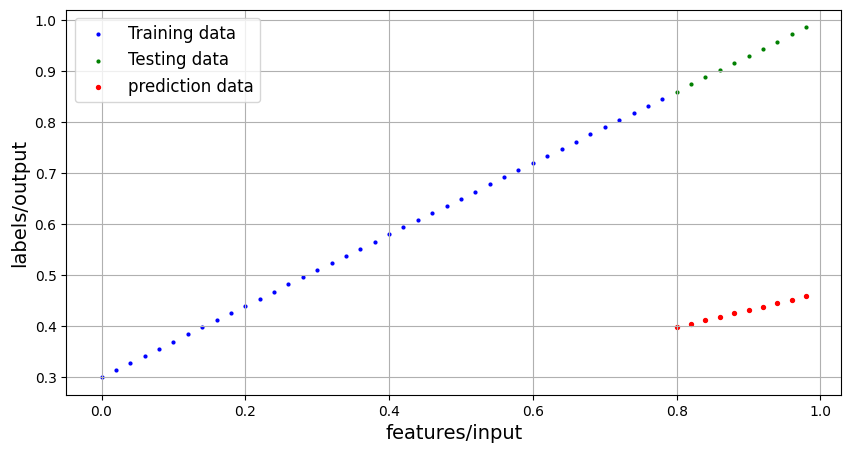

In [ ]:
with torch.inference_mode():    #older way was "with torch.no_grad():" but not recomended
  y_pred = model_0(x_test)

print(y_pred, "\n")

# visulaizing using the scatter plot func which we created above by changing the prediction from None to y_pred
plot_predictions(prediction=y_pred)

#Training the model by setting up :

1.   lost function
2.   optimizer



*   loss function measure how wrong the predictions/guesses of the model are i.e pred is 6 units,should be 9 units so loss is 3 units.**the lower the loss function is the more accurate the model and predictions are**

*   Optimzer looks at the loss function and fixes the model by adjusting parameters/patterns(weights and bias little by little) over and over again in a loop until loss is minimum or finished





In [ ]:
# params
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# setting up the loss function
loss_func= nn.L1Loss()

# setting up the optimizer
optimizer= torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)
# optimzer will increase or decrease params (through learning rate lr "lr=0.01" which is set by us is called hyperParameter) checking which one will reduce the loss which is being measured by (MAE)nn.L1loss


#Building the trainig loop(& Trainig loop) in pytorch

In [ ]:
# number of times to go trough the data
torch.manual_seed(41)
epoch= 500

epoch_count=[]
loss_values=[]
after_testing_loss_values=[]

for epoch in range(epoch):
  model_0.train()  #setting the model to trainig mode

  # forward passing the data through the model and to make prediction on current parameters
  y_preds= model_0(x_train)

  # calculating the loss bertween "predicted data" just in above line and "labeled data(real answers)""
  loss= loss_func(y_preds, y_train)
  # print(f"loss:{loss}")

  #clear old calculations(gradients),Wipes the whiteboard clean before doing new math.
  optimizer.zero_grad()

  # measures how wrong are predictions(how big is loss), Which direction should I move weight and bias to make loss smaller?"
  loss.backward()

  # Actually updates the weight and bias using: The gradients from loss.backward() & The learning rate you defined (lr=0.01)
  optimizer.step()

# "Now stop training, I want to test the model, not learn." it turns off things like dropout (used in more complex models)
  model_0.eval()

# stopcalculating gradients i want to make predictions
  with torch.inference_mode():
    test_predictions= model_0(x_test)

  loss_after_test= loss_func(test_predictions, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss.item())
    after_testing_loss_values.append(loss_after_test.item())
    print(f"epoch: {epoch} , loss values : {loss}, loss after testing: {loss_after_test}")

model_0.state_dict()

epoch: 0 , loss values : 0.31288138031959534, loss after testing: 0.48106518387794495
epoch: 10 , loss values : 0.1976713240146637, loss after testing: 0.3463551998138428
epoch: 20 , loss values : 0.08908725529909134, loss after testing: 0.21729660034179688
epoch: 30 , loss values : 0.053148526698350906, loss after testing: 0.14464017748832703
epoch: 40 , loss values : 0.04543796554207802, loss after testing: 0.11360953003168106
epoch: 50 , loss values : 0.04167863354086876, loss after testing: 0.09919948130846024
epoch: 60 , loss values : 0.03818932920694351, loss after testing: 0.08886633068323135
epoch: 70 , loss values : 0.03476089984178543, loss after testing: 0.0805937647819519
epoch: 80 , loss values : 0.03132382780313492, loss after testing: 0.07232122868299484
epoch: 90 , loss values : 0.02788739837706089, loss after testing: 0.06473556160926819
epoch: 100 , loss values : 0.024458957836031914, loss after testing: 0.05646304413676262
epoch: 110 , loss values : 0.021020207554101

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

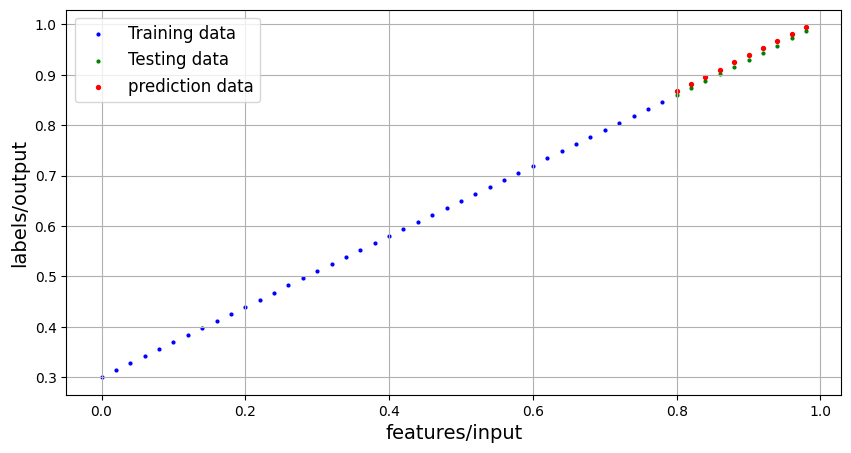

In [ ]:
# testingish with newly updated weights bias and less loss
torch.manual_seed(40)
with torch.inference_mode():
  y_pred_new= model_0(x_test)

plot_predictions(prediction=y_pred_new)


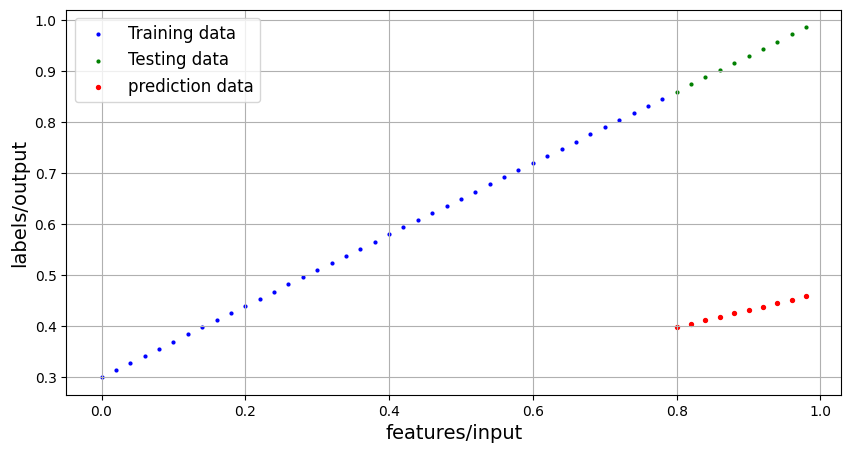

In [ ]:

plot_predictions(prediction=y_pred)

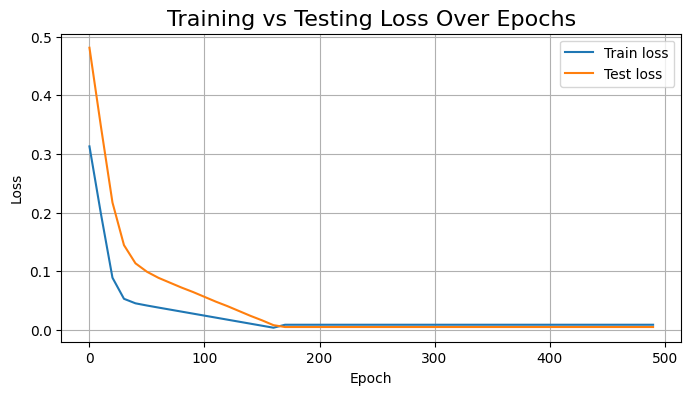

In [ ]:
# ploting the loss graphs with respect to epoch count

plt.figure(figsize=(8,4))

plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count,  after_testing_loss_values, label="Test loss")

plt.legend(fontsize=10)
plt.xlabel("Epoch", size=10)          # Label for X-axis
plt.ylabel("Loss", size=10)           # Label for Y-axis
plt.grid(True)
plt.title("Training vs Testing Loss Over Epochs", size=16)
plt.show()

#Saving`(model's state_dict)` -- **recommended** 1st way

In [ ]:
# here i already created the dir/folder ,just have to name the file.pth and save
torch.save(model_0.state_dict(),'trying_1st_path/01_linear.pth')

#Saving Model (model's state_dict) -- recommended 2nd way

In [ ]:
# here i am creating the directry using pathlib then doing the saving in other line
from pathlib import Path

model_path= Path("trying_2nd_path").mkdir(parents=True , exist_ok=True)

torch.save(model_0.state_dict(),'trying_2nd_path/01_pytorch_workflow.pth')

#Loading the saved model static_dict()

In [ ]:
loaded_model=LinearRegressionModel()
print(loaded_model.state_dict()) #just showing random weights bcz trained model not loaded yet

# model params are loaded now
loaded_model.load_state_dict(torch.load('trying_2nd_path/01_pytorch_workflow.pth'))

# to use it you have to initialize eval state
loaded_model.eval()

with torch.inference_mode():
  loaded_model_preds=loaded_model(x_test)

# testing if predictions before loading and after loading same or not(meaning checking if weights and bias tempered with?)
loaded_model_preds == y_pred_new

OrderedDict([('weight', tensor([0.8855])), ('bias', tensor([-0.4909]))])


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

#6 PUTTING IT ALTOGATHER IN ONE GO! 2.0

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [ ]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'

weight=0.7
bias=0.3

#creating input/feature
start= 0
end=1
step=0.02

X= torch.arange(start,end,step).unsqueeze(dim=1)#.shape
# print(X)

# the predictions for supervised learnig

Y= weight * X +bias
# print(Y)

#DIVIDING DATA FOR TRAINING AND TESTING 80/30 respectively

In [ ]:
# splitting data for trainig and testing
training_split= int(0.8 *len(X))
print(training_split)

# slicing te data

# trainig data and it's true result
x_training_data= X[ : training_split]
y_true_data= Y[ : training_split]

# testing data and it's true result
x_testing_data= X[training_split : ]
y_testing_true_data = Y[training_split : ]



40


#PLOTTING TRAING AND TESTING DATA WITH TRUE`(right outcome data)`

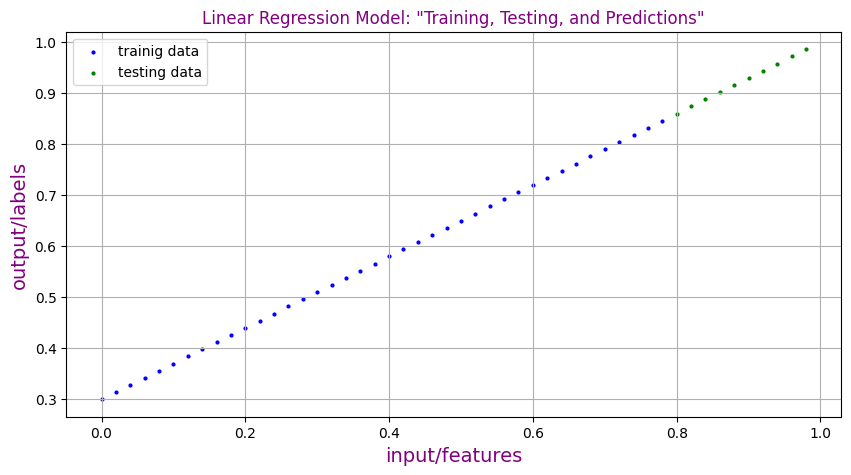

In [ ]:
def plot_predictions2_0(x_train=x_training_data, y_true=y_true_data, x_test=x_testing_data, y_test=y_testing_true_data,predictions=None):
  plt.figure(figsize=(8,4))

  plt.scatter(x_train , y_true, c='b' ,s=4, label='trainig data')
  plt.scatter(x_test , y_test , c='g' ,s=4, label='testing data')

  if predictions is not None:
    plt.scatter(x_test, predictions, c='r',s=4, label='predictions')

  plt.legend(fontsize=10)
  plt.title('Linear Regression Model: "Training, Testing, and Predictions"',c='purple')
  plt.xlabel('input/features',fontsize=14,c='purple')
  plt.ylabel('output/labels',fontsize=14,c='purple')
  plt.grid()
  plt.show()

plot_predictions2_0()

## BUILDING THE MODEL

In [ ]:
class LinearRegressionModel_2(nn.Module):
  def __init__(self):
    super().__init__()

    # self.weight=nn.parameter(torch.randn(1,dtype=float),requires_grad=True)
    self.Linear_layer= nn.Linear(in_features=1, out_features=1)

  def forward(self, x:torch.Tensor)->torch.Tensor:
    return self.Linear_layer(x)



In [ ]:
# model_1
torch.manual_seed(42)
model_1= LinearRegressionModel_2()

print( model_1.state_dict() , "\n" )

# converting model to gpu
model_1.to(device)
next(model_1.parameters()).device

OrderedDict([('Linear_layer.weight', tensor([[0.7645]])), ('Linear_layer.bias', tensor([0.8300]))]) 



device(type='cuda', index=0)

### Plotting with the layers(weight and bias) given initially without training

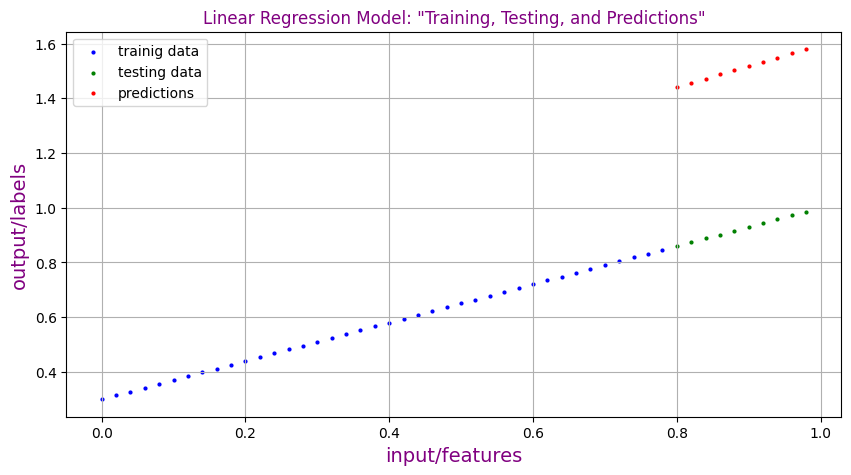

In [ ]:
with torch.inference_mode():
  initial_pred= model_1(x_testing_data.to(device)) # testing and training data is on cpu

plot_predictions2_0(predictions=initial_pred.cpu().numpy()) #turning the pred into numpy and to cpu before ploting.--> imp

In [ ]:
# loss function and optimizer for model

loss_fn=nn.SmoothL1Loss()

optimizer=torch.optim.Adam(params=model_1.parameters(),
                           lr=0.1)
scheduler= torch.optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.001)



In [ ]:
# # converting data to  gpu
x_training_data = x_training_data.to(device)
y_true_data = y_true_data.to(device)
x_testing_data = x_testing_data.to(device)
y_testing_true_data = y_testing_true_data.to(device)

# Print the device of one of the tensors to verify
print(f"Device of x_training_data: {x_training_data.device}")

Device of x_training_data: cuda:0


##TRAINING & TESTING THE MODEL

In [ ]:
torch.manual_seed(41)

epoch=300
# trainimg

epoch_count1=[]
loss_values1=[]
loss_after_testing1=[]

# Start the training loop
for epoch in range(epoch):
    # 1. Set the model to training mode (enables gradient tracking)
    model_1.train()

    # 2. Forward pass → model makes predictions using current weights/bias
    y_prediction = model_1(x_training_data)

    # 3. Calculate loss between predicted and real (true) values
    loss_1 = loss_fn(y_prediction, y_true_data)

    # 4. Zero the gradients before backpropagation
    optimizer.zero_grad()

    # 5. Backpropagation → calculate gradients w.r.t. loss
    loss_1.backward()

    # 6. Update the weights and bias using optimizer and gradients
    optimizer.step()

    # --- Evaluation (Testing Phase) ---

    # 7. Set the model to evaluation mode (turns off gradient tracking)
    model_1.eval()

    # 8. Make predictions on the test data (without tracking gradients)
    with torch.inference_mode():
        test_predictios = model_1(x_testing_data)

        # 9. Calculate loss on test data
        loss_after_testing = loss_fn(test_predictios, y_testing_true_data)

    # 10. Save epoch and loss values for plotting later
    epoch_count1.append(epoch)
    loss_values1.append(loss_1.item())                      # Convert loss from tensor to number
    loss_after_testing1.append(loss_after_testing.item())

    # 11. Print every 20 epochs to track progress
    if epoch % 20 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss_1} | Test Loss: {loss_after_testing}")

# 12. View the final trained parameters (weights and bias)
model_1.state_dict()


Epoch: 0 | Train Loss: 0.1542222797870636 | Test Loss: 0.07938215881586075
Epoch: 20 | Train Loss: 0.010089808143675327 | Test Loss: 0.005180578678846359
Epoch: 40 | Train Loss: 0.0007461460190825164 | Test Loss: 0.0013806282076984644
Epoch: 60 | Train Loss: 0.00012851985229644924 | Test Loss: 0.0005021071410737932
Epoch: 80 | Train Loss: 2.3391517970594577e-05 | Test Loss: 4.7150162572506815e-05
Epoch: 100 | Train Loss: 4.3506020119821187e-07 | Test Loss: 8.35249011288397e-07
Epoch: 120 | Train Loss: 3.4822369343601167e-07 | Test Loss: 7.940681712170772e-07
Epoch: 140 | Train Loss: 3.5894409666781257e-09 | Test Loss: 5.842468908667797e-08
Epoch: 160 | Train Loss: 3.098114209620917e-09 | Test Loss: 6.255277407163362e-10
Epoch: 180 | Train Loss: 7.632788845413074e-10 | Test Loss: 1.4698532391221875e-09
Epoch: 200 | Train Loss: 1.0003786687917682e-10 | Test Loss: 2.5789290147848476e-10
Epoch: 220 | Train Loss: 1.165116874507488e-11 | Test Loss: 1.953743937466168e-11
Epoch: 240 | Train Lo

OrderedDict([('Linear_layer.weight', tensor([[0.7000]], device='cuda:0')),
             ('Linear_layer.bias', tensor([0.3000], device='cuda:0'))])

#Making predictions from trained and tested model

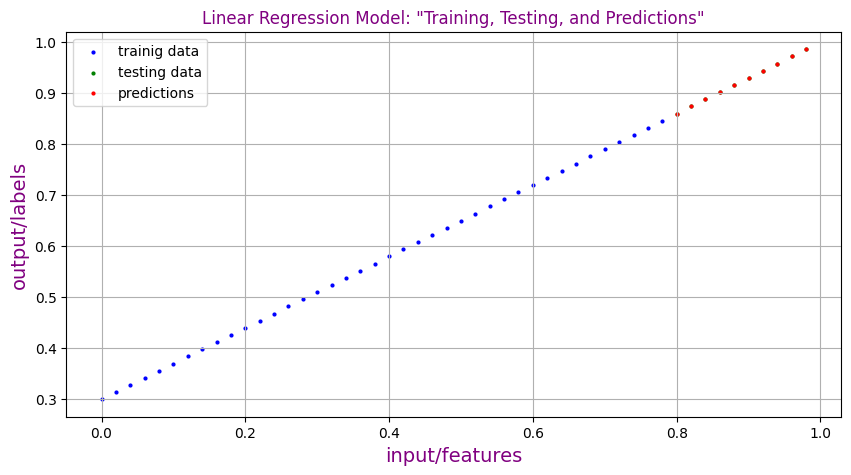

In [ ]:
# model seem to be ready now making proper predictions
model_1.eval()

torch.manual_seed(40)
with torch.inference_mode():
  real_preds= model_1(x_testing_data)

plot_predictions2_0(predictions= real_preds.cpu())

##plotting loss values before and after testing with epoch respectively

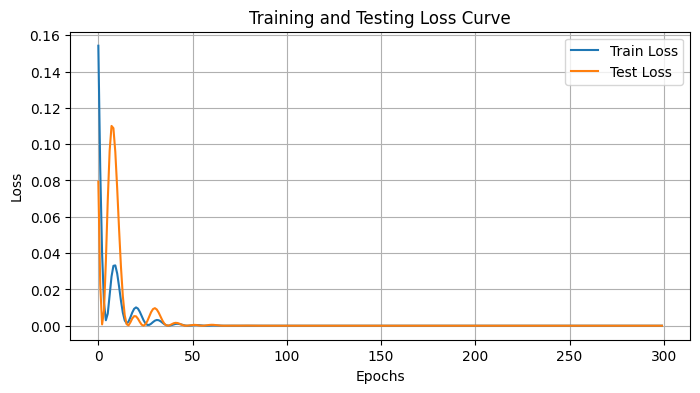

In [ ]:
plt.figure(figsize=(8,4))

plt.plot(epoch_count1, loss_values1,        label='Train Loss')
plt.plot(epoch_count1, loss_after_testing1 ,label='Test Loss')

plt.title("Training and Testing Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.grid()
plt.show()

#Saving and loading the model `state_dict()`

In [ ]:

from pathlib import Path

model_path= Path('updated model').mkdir(parents=True , exist_ok=True)

torch.save(model_1.state_dict(), 'updated model/2.0 version of linearRegressionModel model.pth')


In [ ]:
# 1. Create a new instance of the same model class we used earlier
load_model_1 = LinearRegressionModel_2()

# 2. Move the model to the same device (CPU or GPU) as your data
load_model_1.to(device)

# 3. Load the saved model weights (state_dict) into the new model. This updates the model with the trained weights and bias from before
load_model_1.load_state_dict(torch.load('updated model/2.0 version of linearRegressionModel model.pth'))

# 4. Set the model to evaluation mode .This turns off any training-specific behaviors (like dropout, if there were any)
load_model_1.eval()

# 5. Make predictions on the test data using the loaded model .inference_mode() makes prediction faster and uses less memory
with torch.inference_mode():
    load_model_preds = load_model_1(x_testing_data)

# 6. Check if the predictions made by the loaded model are the same as before This confirm that the model was correctly saved and loaded
load_model_preds == real_preds  # This returns a tensor of True/False values


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')